In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**DATA DESCRIPTION**

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**DATA INFO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**CHECKING FOR MISSING VALUES**

In [ ]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There is no missing values inside the data

**CHECKING FOR ANY OUTLIERS**

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
df_spend= df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

**NUMBER OF OUTLIERS IN EACH COLUMNS**

In [ ]:
for k in df.columns:
    q1= df[k].quantile(0.25)
    q3= df[k].quantile(0.75)
    iqr= q3-q1
    low = q1-1.5*iqr
    upp= q3+1.5*iqr
    outliers= df[((df[k]<low)|(df[k]>upp))]    
    print(k, len(outliers))

Channel 0
Region 0
Fresh 20
Milk 28
Grocery 24
Frozen 43
Detergents_Paper 30
Delicassen 27


**REMOVING ALL OUTLIERS**

In [ ]:
for j in df:
    Q1 = df[j].quantile(0.25)
    Q3 = df[j].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[j].where(df[j] >=l_lim,l_lim, inplace=True)  #clipping all lower outliers with lower limit
    df[j].where(df[j] <=u_lim,u_lim, inplace=True)  #clipping all upper outliers with upper-limit

**CHECKING NUMBER OF OUTLIERS AFTER REMOVING THEM**

In [ ]:
for k in df.columns:
    q1= df[k].quantile(0.25)
    q3= df[k].quantile(0.75)
    iqr= q3-q1
    low = q1-1.5*iqr
    upp= q3+1.5*iqr
    outliers= df[((df[k]<low)|(df[k]>upp))]    
    print(k, len(outliers))

Channel 0
Region 0
Fresh 0
Milk 0
Grocery 0
Frozen 0
Detergents_Paper 0
Delicassen 0


**SCAILING**

In [ ]:
sc= StandardScaler()
sc.fit(df)

StandardScaler()

In [ ]:
scaled_data= sc.transform(df)

In [ ]:
scaled_data

array([[ 1.44865163,  0.59066829,  0.12857261, ..., -0.95324427,
         0.09579175,  0.06589216],
       [ 1.44865163,  0.59066829, -0.42162716, ..., -0.30973493,
         0.30651872,  0.47075856],
       [ 1.44865163,  0.59066829, -0.49064723, ..., -0.04243744,
         0.38243489,  2.46943983],
       ...,
       [ 1.44865163,  0.59066829,  0.31112285, ..., -0.86054235,
         2.39229863,  0.55487464],
       [-0.69029709,  0.59066829, -0.10466425, ..., -0.61070442,
        -0.75732904,  0.7933576 ],
       [-0.69029709,  0.59066829, -0.84025742, ..., -1.01518413,
        -0.65213577, -1.1228252 ]])

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
scaled_df= pd.DataFrame(scaled_data,columns=
                     ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])

In [ ]:
scaled_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,-0.690297,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,1.448652,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,-0.690297,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


**MODELLING**

**KMEANS CLUSTERING**

In [ ]:
WCSS= [] #Within the cluster sum of square . 
for i in range(1,11):
  kmeans= KMeans(n_clusters= i,init= 'k-means++',random_state=9)
  kmeans.fit(scaled_df)
  WCSS.append(kmeans.inertia_)

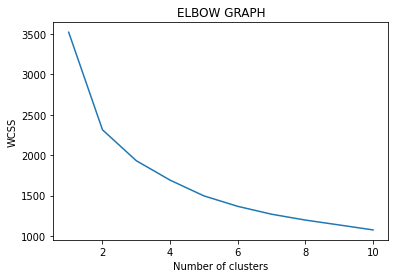

In [ ]:
plt.plot(range(1,11),WCSS)
plt.title('ELBOW GRAPH')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(init='k-means++' , n_clusters=3, random_state=0)

cluster_model=kmeans.fit(scaled_df)

In [ ]:
pred= kmeans.fit_predict(scaled_df)

In [ ]:
print(pred)

[2 2 2 1 1 2 2 2 0 2 2 0 2 2 2 0 2 0 2 0 2 0 1 2 2 2 0 0 2 1 1 0 0 1 0 2 1
 2 2 1 1 1 2 2 2 2 2 2 2 2 0 0 1 2 1 0 2 2 0 0 2 2 2 2 0 2 0 2 1 0 1 1 1 1
 2 1 1 2 0 0 0 2 2 0 0 2 2 1 1 1 0 1 2 1 2 0 2 0 0 0 2 2 2 1 0 0 2 2 2 2 0
 2 1 0 0 0 0 0 1 0 0 0 0 2 1 1 1 2 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 2 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 1 1 0 0 0 1 2 1 0
 0 0 0 2 2 1 0 0 2 0 1 1 2 0 0 2 2 1 0 0 2 0 2 0 2 0 2 0 0 2 2 2 0 2 0 0 0
 0 0 0 0 2 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 2 1 1 1 1 0 0 1
 1 0 0 0 0 2 1 2 1 2 0 0 0 0 1 0 0 1 1 1 2 0 2 1 1 1 0 0 1 0 0 0 0 0 2 0 0
 0 2 2 0 2 2 2 2 2 2 2 0 0 2 1 1 2 0 0 2 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 2 1
 2 1 2 0 1 0 1 2 2 0 2 0 0 2 2 0 2 0 2 0 2 1 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0
 1 1 0 2 0 0 2 1 0 2 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 1 0 0 1 0 1
 2 0 1 0 0 0 1 0 2 2 0 2 0 2 2 0 0 2 1 2 1 0 0 0 1 0 0 0 1 1 2 0 0]


In [ ]:
scaled_df['kmeans_clustering']= pred
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans_clustering
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892,2
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759,2
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440,2
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851,1
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440,1


**HIERARCHICAL CLUSTERING**

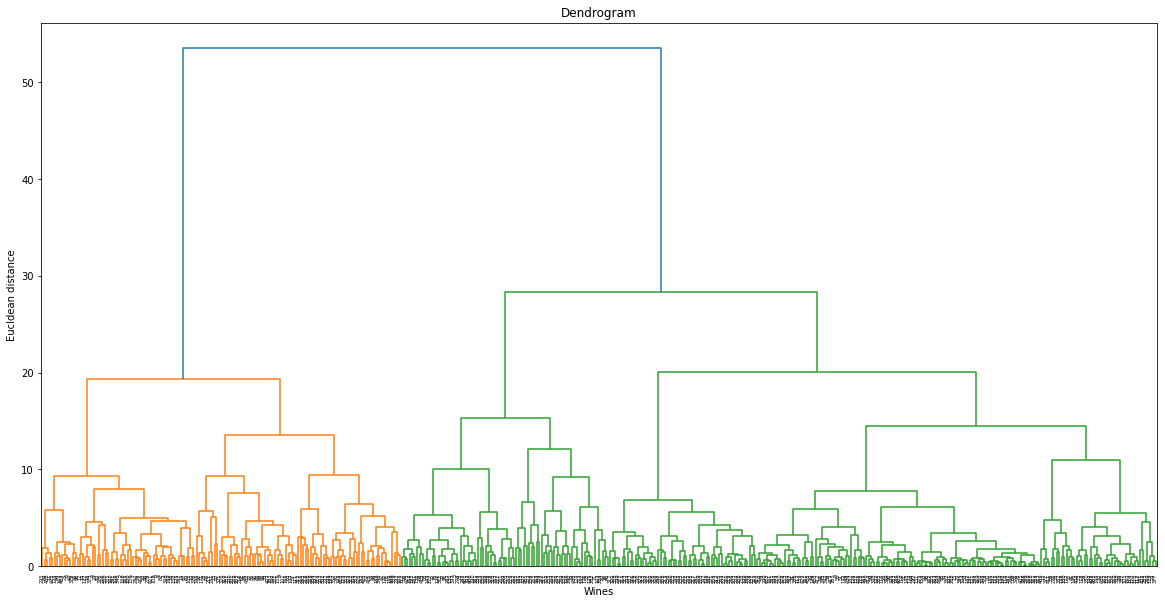

In [ ]:
plt.figure(figsize=(20,10))
den= sch.dendrogram(sch.linkage(scaled_df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Eucldean distance')
plt.show()

Here number of clusters= 3

In [ ]:
hc= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
pred_hc= hc.fit_predict(scaled_df)

In [ ]:
print(pred_hc)

[1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 2 1 1 1 0 0 1 0 0 0 0 2 0 1 0
 1 1 2 2 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 2 0 2 2 2 2
 1 0 2 1 0 0 0 1 1 0 1 1 1 2 2 0 0 2 1 2 1 0 1 0 0 0 1 1 1 2 0 0 1 1 1 1 0
 1 2 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 2 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 2 0 0 0 0 2 1 2 0
 0 0 0 1 1 2 0 0 1 0 2 2 1 0 0 1 1 2 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0
 2 2 0 0 1 0 0 2 2 0 0 0 2 0 0 2 0 2 2 0 0 0 0 1 0 0 0 2 0 1 2 2 2 2 0 0 2
 2 0 2 0 0 1 2 1 2 1 0 2 0 0 2 0 0 0 2 2 1 0 1 2 2 2 0 0 2 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 2 2 1 0 0 1 0 0 0 1 0 0 0 0 2 2 0 0 2 0 0 1 2
 1 2 1 0 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 2 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0
 1 2 0 1 0 0 1 0 0 1 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 0 2 0 0 0 0 2
 1 1 0 0 0 0 2 0 1 1 0 1 0 1 1 0 1 1 2 1 2 0 0 0 2 0 0 0 2 2 1 0 0]


In [ ]:
scaled_df['heirarchical clustering']= pred_hc

In [ ]:
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans_clustering,heirarchical clustering
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892,2,1
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759,2,1
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440,2,1
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851,1,2
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440,1,1
